In [1]:
import os
import sys
pp_path = os.path.join("..", "pySMOKEPostProcessor")
sys.path.append(pp_path)
from pySMOKEpostprocessor import *
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import numpy as np

# Sensitivity Analysis

Inside this notebook it is shown a more advanced use of the post-processor to visualize and compare the local sensitivity analysis in different conditions.

![Kernel & front-end diagram](figures/ohx.png)

Inside the Figure reported below it is possible to see the profile of the molar fraction of OH evolving in time. Sometimes it is necessary to understand the underlying kinetics at different stages. So as it can be seen in the figure three different local value are selected and hereinafter the sensitivity analysis will be carried on to study the different situations.


In [2]:
kineticFolder = os.path.join("Sensitivity", "kinetics-OME")
resultsFolder = os.path.join("Sensitivity", "Output-02")

pp = pySMOKEpostproccesor(kinetic_mechanism = kineticFolder,
                          results_folder = resultsFolder,
                          verbose=True)

ROPA available
Sensitivity analysis available on: OME2  temperature  


In [3]:
specie = "OME2"

c1, i1, n1 = pp.SensitivityAnalysis(specie=specie,
                                    sensitivity_type='local',
                                    ordering_type="peak_value",
                                    normalization_type='max_value',
                                    local_value = 0.0022,
                                    number_of_reactions=20)

c2, i2, n2 = pp.SensitivityAnalysis(specie=specie,
                                    sensitivity_type='local',
                                    ordering_type="peak_value",
                                    normalization_type='max_value',
                                    local_value = 0.0024,
                                    number_of_reactions=20)

c3, i3, n3 = pp.SensitivityAnalysis(specie=specie,
                                    sensitivity_type='local',
                                    ordering_type="peak_value",
                                    normalization_type='max_value',
                                    local_value = 0.00265,
                                    number_of_reactions=20)

Sensitivity analysis succesfully executed!
Sensitivity analysis succesfully executed!
Sensitivity analysis succesfully executed!


In [4]:
dic1 = {'Sensitivity-Coeff-1': c1,'Indices-0based': i1, 'Reaction Name': n1}
dic2 = {'Sensitivity-Coeff-2': c2,'Indices-0based': i2, 'Reaction Name': n2}
dic3 = {'Sensitivity-Coeff-3': c3,'Indices-0based': i3, 'Reaction Name': n3}

df1 = pd.DataFrame(dic1)
df2 = pd.DataFrame(dic2)
df3 = pd.DataFrame(dic3)

df1.head()

,Sensitivity-Coeff-1,Indices-0based,Reaction Name
0,-0.760783,464,R465: OME2-O2QOOH=>O2+OME2-QOOH
1,-0.755671,439,R440: OME2-QOOH=>OME2-RO2
2,0.747495,440,R441: O2+OME2-ROOH=>HO2+OME2-RO2
3,-0.192411,469,R470: OME2-OQOOH=>OH+CH2O+CH3OCH2OCOO
4,-0.191840,468,R469: OME2-OQOOH=>OH+OCHO+DMM-ket


In [5]:
df_tmp = pd.merge(df1, df2, on = 'Indices-0based')
df = pd.merge(df_tmp, df3, on = 'Indices-0based')
df = df.drop(['Reaction Name_x', 'Reaction Name_y'], axis = 1)
df.head()

,Sensitivity-Coeff-1,Indices-0based,Sensitivity-Coeff-2,Sensitivity-Coeff-3,Reaction Name
0,-0.760783,464,-0.537395,-12.774780,R465: OME2-O2QOOH=>O2+OME2-QOOH
1,-0.755671,439,-0.393964,-8.646938,R440: OME2-QOOH=>OME2-RO2
2,0.747495,440,0.389103,8.528833,R441: O2+OME2-ROOH=>HO2+OME2-RO2
3,-0.192411,469,-0.092978,-1.965563,R470: OME2-OQOOH=>OH+CH2O+CH3OCH2OCOO
4,-0.191840,468,-0.083654,-1.788613,R469: OME2-OQOOH=>OH+OCHO+DMM-ket


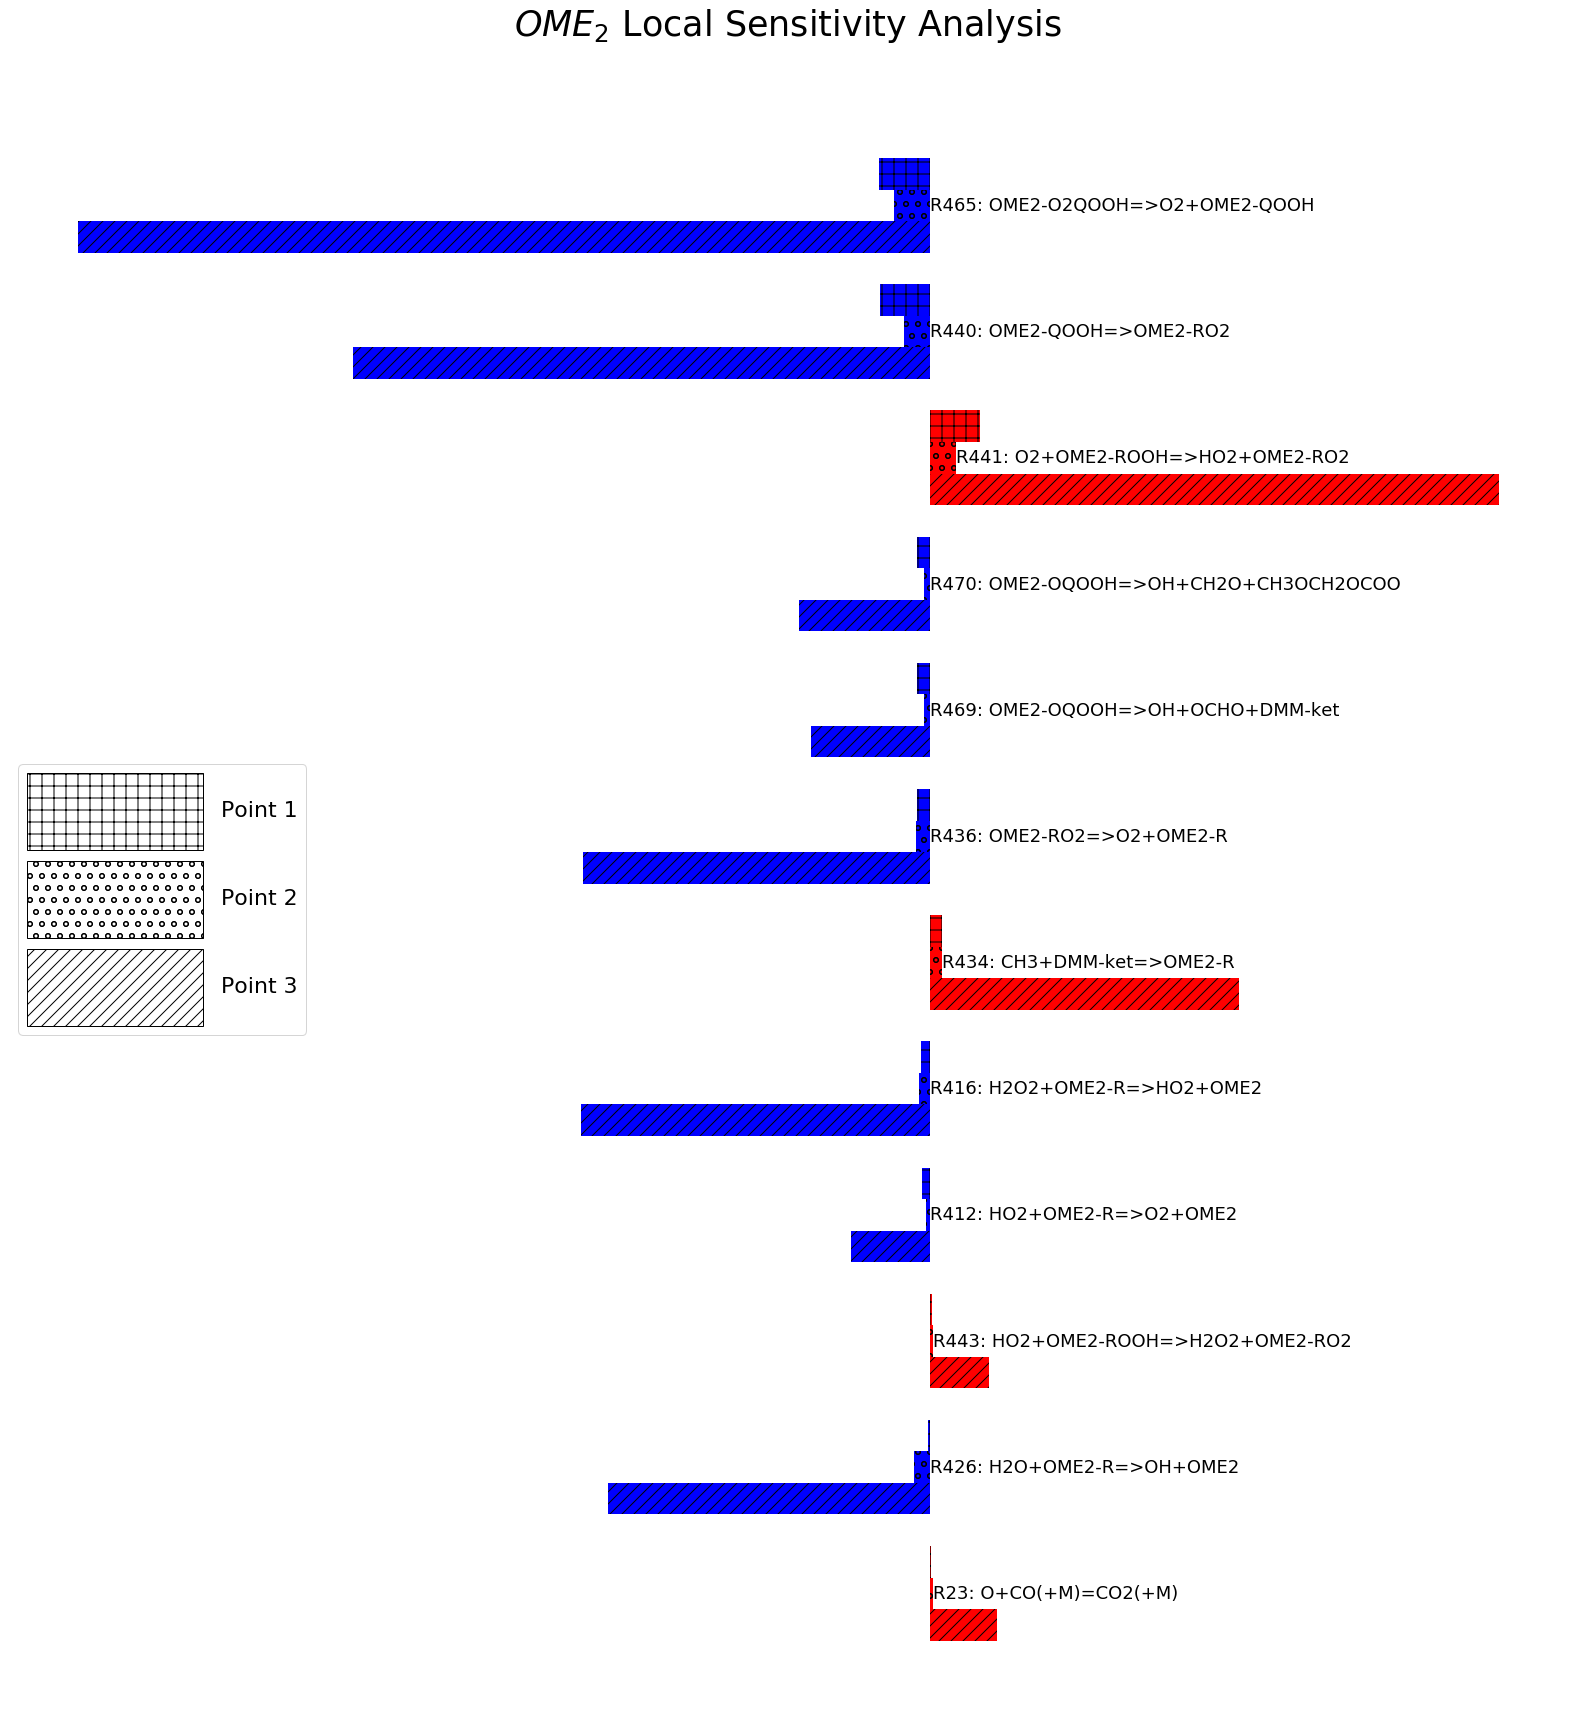

In [6]:
fig = plt.figure(figsize=(28,30))
ax = plt.subplot()
ax.set_title("$OME_2$ Local Sensitivity Analysis\n ", fontsize=35)

barWidth = 0.25
br1 = np.arange(len(df['Sensitivity-Coeff-1']))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

ax.barh(br1, df['Sensitivity-Coeff-1'], 
        color = (df['Sensitivity-Coeff-1'] >=0.).map({True:'#FF0000', False:'#0000FF'}), 
        hatch = '+',
        height = barWidth,
        align = 'edge')
bar = ax.barh(br2, df['Sensitivity-Coeff-2'], 
              color = (df['Sensitivity-Coeff-2'] >=0.).map({True:'#FF0000', False:'#0000FF'}), 
              hatch = 'o',
              height = barWidth,
              align = 'edge')
ax.barh(br3, df['Sensitivity-Coeff-3'], 
        color = (df['Sensitivity-Coeff-3'] >=0.).map({True:'#FF0000', False:'#0000FF'}),
        hatch = '//',
        height = barWidth,
        align = 'edge')

for idx, i in enumerate(bar):
    x = i.get_width() + 0.005
    y = i.get_y()+0.5*i.get_height()
    if(x<0):
        ax.text(0, y, 
            df['Reaction Name'][idx], 
            va='center', fontsize=18)
    else:
        ax.text(x, y, 
            df['Reaction Name'][idx], 
            va='center', fontsize=18)

legend_elements = [Patch(facecolor='w', edgecolor='k', hatch = '+',label='Point 1'),
                  Patch(facecolor='w', edgecolor='k', hatch = 'o',label='Point 2'),
                  Patch(facecolor='w', edgecolor='k', hatch = '//',label='Point 3')]

ax.legend(handles=legend_elements, loc='center left',handleheight=5, handlelength=8, fontsize = 22)
ax.axis("off")
ax.invert_yaxis()
plt.show()